In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

In [3]:
data = datasets.load_breast_cancer()

In [4]:
Xs=data.data
scaler = preprocessing.StandardScaler().fit(Xs)
scaler.transform(Xs)

Xv=[]
Yv=[]
X=[]
Y=[]
for i in range(len(Xs)):
    if(i<114):
        Xv.append(Xs[i])
        Yv.append(data.target[i])
    else:
        X.append(Xs[i])
        Y.append(data.target[i])

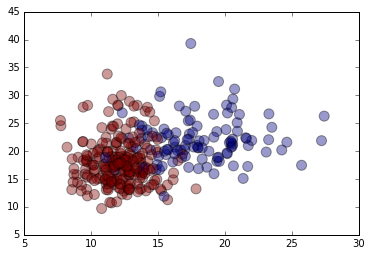

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=Y_train, s=100, alpha=0.4)

In [6]:
#C = np.linspace(0.01,50,10)
#D = range(10)
#falsospositivostest=[]
#for i in range(len(C)):
    #intermediotest=[]
    #for j in range(len(D)):
        #kernel_svc = svm.SVC(C=C[i], kernel='poly', degree=D[j])
        #kernel_svc.fit(X_train,Y_train)
        #Y_predicttest = kernel_svc.predict(X_test)
        #n_falsospositivostest=0
        #for k in range(len(Y_predicttest)):
            #if(Y_predicttest[k]==1 and Y_test[k]==0):
                #n_falsospositivostest+=1
        #n_totaltest= 1.0*len(Y_predicttest)
        #intermediotest.append(n_falsospositivostest/n_totaltest)
    #falsospositivostest.append(intermediotest)
        
        
        



In [7]:
C = np.linspace(0.01,10,10)
gamma = np.linspace(0.00001,1,100)
falsospositivostest=[]
aciertos=[]
for i in range(len(C)):
    intermediotest=[]
    intermediosaciertos=[]
    for j in range(len(gamma)):
        kernel_svc = svm.SVC(C=C[i], kernel='rbf', gamma=gamma[j])
        kernel_svc.fit(X_train,Y_train)
        Y_predicttest = kernel_svc.predict(X_test)
        n_falsospositivostest=0
        n_aciertos=0
        for k in range(len(Y_predicttest)):
            if(Y_predicttest[k]==1 and Y_test[k]==0):
                n_falsospositivostest+=1
            if(Y_predicttest[k]==Y_test[k]):
                n_aciertos+=1
        n_totaltest= 1.0*len(Y_predicttest)
        intermediotest.append(n_falsospositivostest/n_totaltest)
        intermediosaciertos.append(n_aciertos/n_totaltest)
    falsospositivostest.append(intermediotest)
    aciertos.append(intermediosaciertos)


In [8]:
minfalsospositivostest=[]
for i in range(len(falsospositivostest)):
    minfalsospositivostest.append(min(falsospositivostest[i]))
print min(minfalsospositivostest)

maxaciertos=[]
for i in range(len(aciertos)):
    maxaciertos.append(max(aciertos[i]))
print max(maxaciertos)





0.0350877192982
0.964912280702


1000
1000


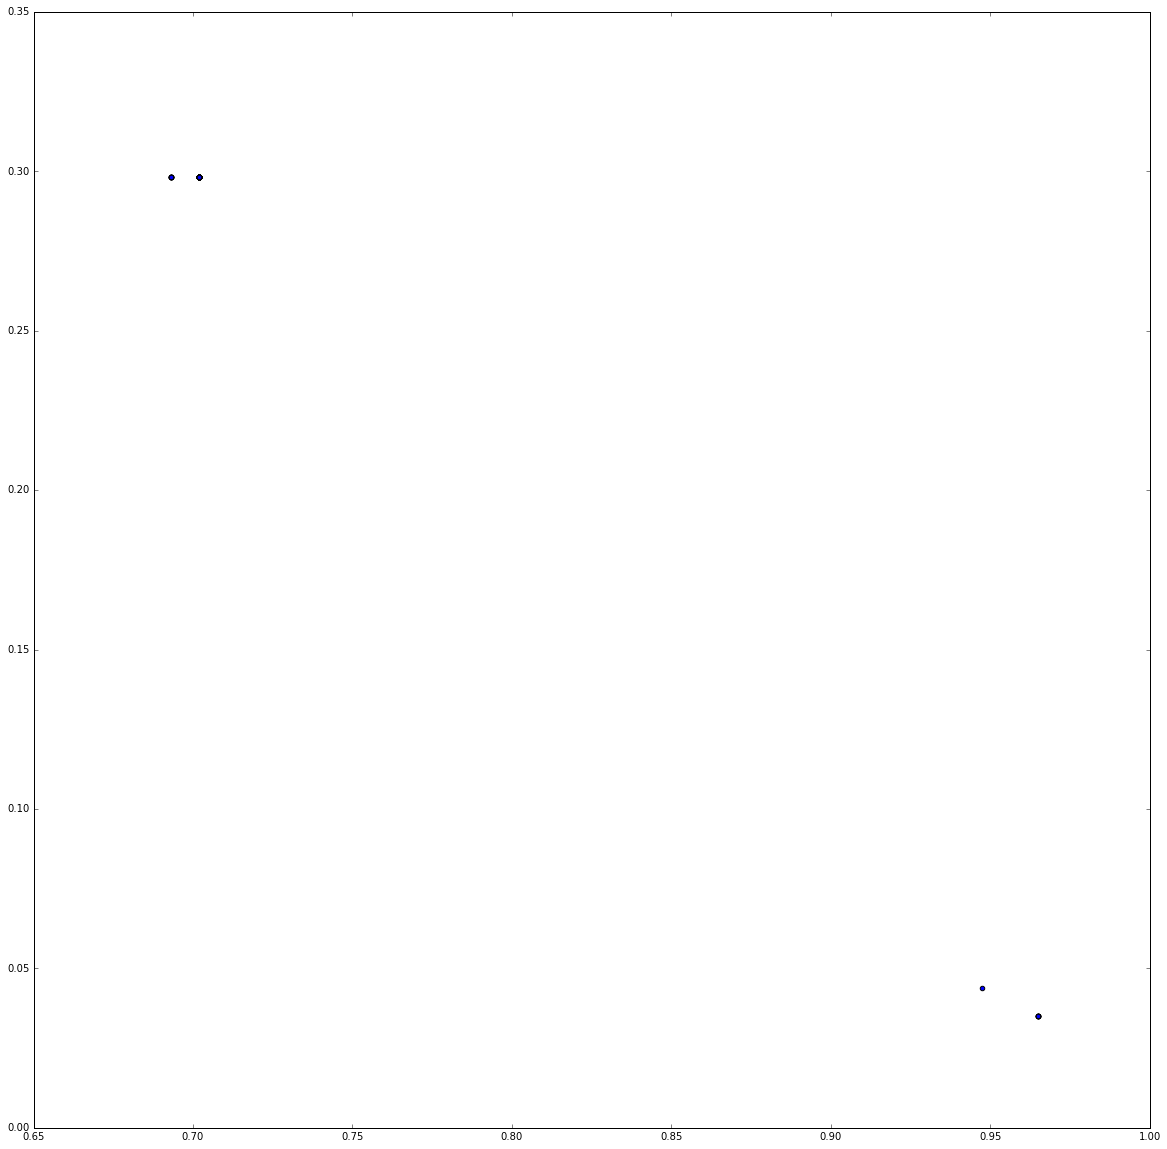

In [9]:
Aciertos=[]
Falsos=[]
for i in range(len(falsospositivostest)):
    for j in range(len(falsospositivostest[i])):
        Falsos.append(falsospositivostest[i][j])
        
for i in range(len(aciertos)):
    for j in range(len(aciertos[i])):
        Aciertos.append(aciertos[i][j])
print(len(Aciertos))
print(len(Falsos))
plt.figure(figsize=(20,20))
plt.scatter(Aciertos,Falsos)
plt.show()

In [12]:
C = np.linspace(0.01,1,100)
falsospositivostest=[]
aciertos=[]
for i in range(len(C)):
    kernel_svc = svm.SVC(C=C[i], kernel='linear')
    kernel_svc.fit(X_train,Y_train)
    Y_predicttest = kernel_svc.predict(X_test)
    n_falsospositivostest=0
    n_aciertos=0
    for k in range(len(Y_predicttest)):
        if(Y_predicttest[k]==1 and Y_test[k]==0):
            n_falsospositivostest+=1
        if(Y_predicttest[k]==Y_test[k]):
            n_aciertos+=1
    n_totaltest= 1.0*len(Y_predicttest)
    falsospositivostest.append(n_falsospositivostest/n_totaltest)
    aciertos.append(n_aciertos/n_totaltest)


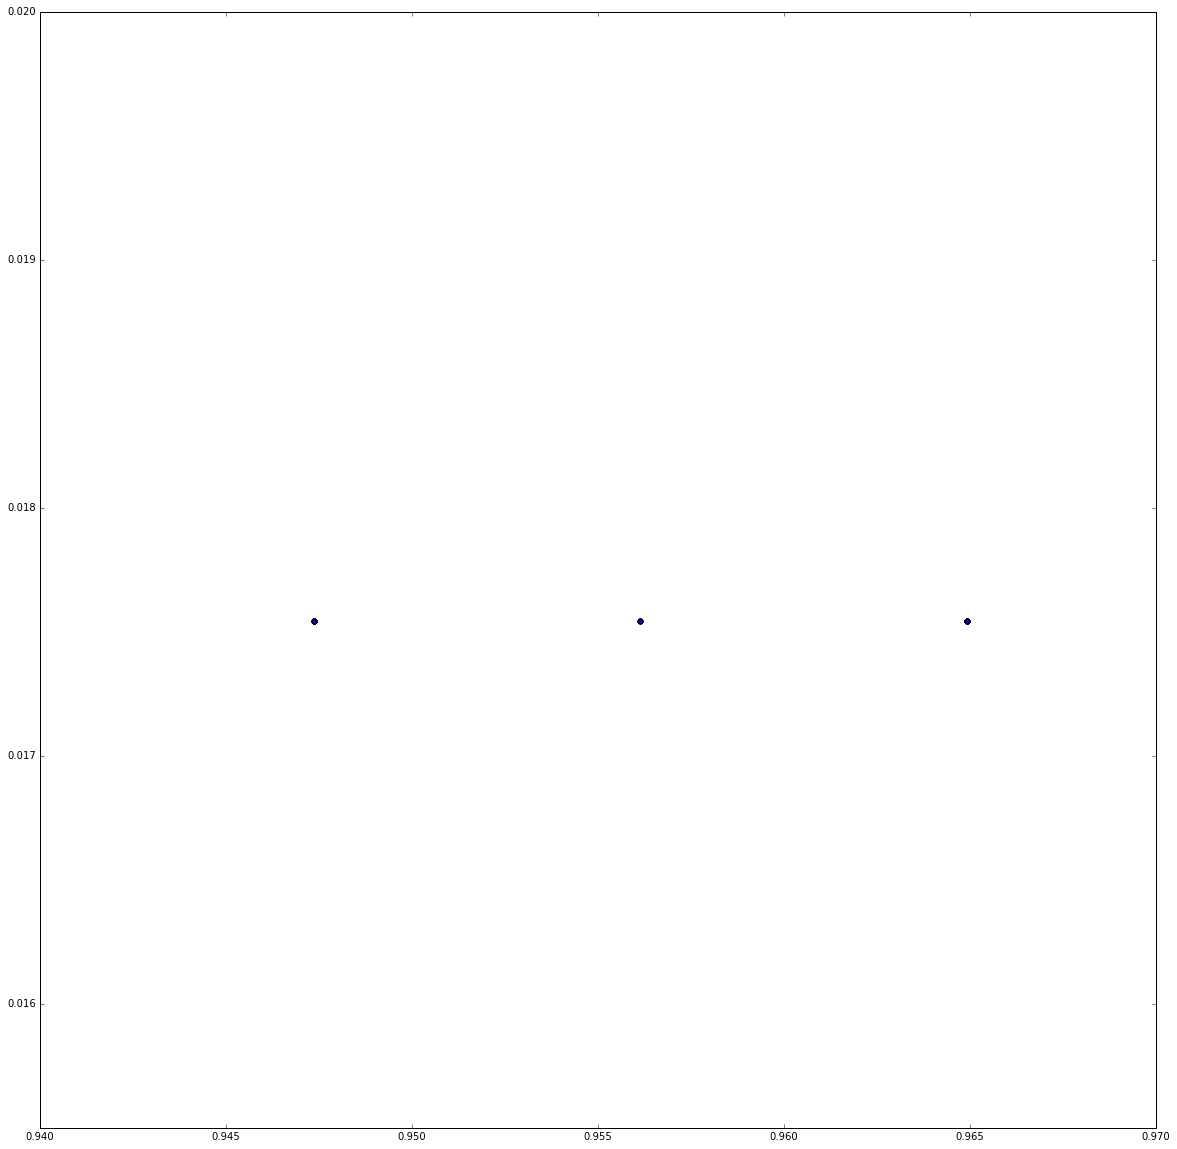

In [13]:
plt.figure(figsize=(20,20))
plt.scatter(aciertos,falsospositivostest)
plt.show()

In [19]:
print(max(aciertos))
print(min(falsospositivostest))
j=0
for i in range(len(aciertos)):
    if(aciertos[i]==max(aciertos) and j==0):
        print C[i]

0.964912280702
0.0175438596491
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.28
0.29
0.3
0.31
0.32
0.33
0.34


In [20]:
kernel_svc = svm.SVC(C=0.34, kernel='linear')
kernel_svc.fit(X_train,Y_train)
Y_predict = kernel_svc.predict(Xv)
n_falsospositivostest=0
n_aciertos=0
for k in range(len(Y_predict)):
    if(Y_predict[k]==1 and Yv[k]==0):
        n_falsospositivostest+=1
    if(Y_predict[k]==Yv[k]):
        n_aciertos+=1
n_totaltest= 1.0*len(Y_predict)
print(n_falsospositivostest/n_totaltest)
print(n_aciertos/n_totaltest)

0.0964912280702
0.90350877193


In [ ]:
#Entonces se concluye que el mejor modelo es uno lineal con c=0.34, que da un porcentaje de falsos positivos de 9.6% y un 
#porcentaje de aciertos de 90.3%. Al ser C tan pequeño estamos haciendo de la frontera muy delgada, asi que la zona de incertidumbre
#es poca